<p align="center" style="background-color: white;">
  <img src="https://www.groupe-gema.com/wp-content/uploads/2023/06/logo__gema.svg" alt="GEMA" style="width: 600px; height: auto;">
</p>

<div style="background-color: #3F579F; color: white; padding: 10px;" id="1">
<h1> <center> B2 - Introduction au traitement de l'image </center> </h1>
</div>

<h5><center> Mars 2025 </center></h5>
<h5><center> C. Sureda G. </center></h5>

---

**<h3>Exercices Chapitre 3: Histogramme</h3>**

---

In [2]:
#Import de librairies nécessaires pour ce chapitre

from PIL import Image        # Permet de charger, traiter et sauvegarder plusieurs formats d'images différents.
from PIL import ImageOps     # Fournit des opérations de traitement d'image telles que le recadrage, le retournement, ou la rotation.
from PIL import ImageEnhance # Offre des fonctions pour ajuster les propriétés des images, telles que la couleur, le contraste, la luminosité et la netteté.

# NumPy est une bibliothèque pour le calcul scientifique en Python.
import numpy as np           # Elle est largement utilisée pour la manipulation de grands tableaux et matrices multidimensionnelles, comme une image.

# Matplotlib est une bibliothèque utilisée pour créer des figures et des graphiques.
import matplotlib.pyplot as plt

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
1. Associer une image à son histogramme
</div>

Pouvez-vous associer chaque histogramme à l'image qui lui correspond?

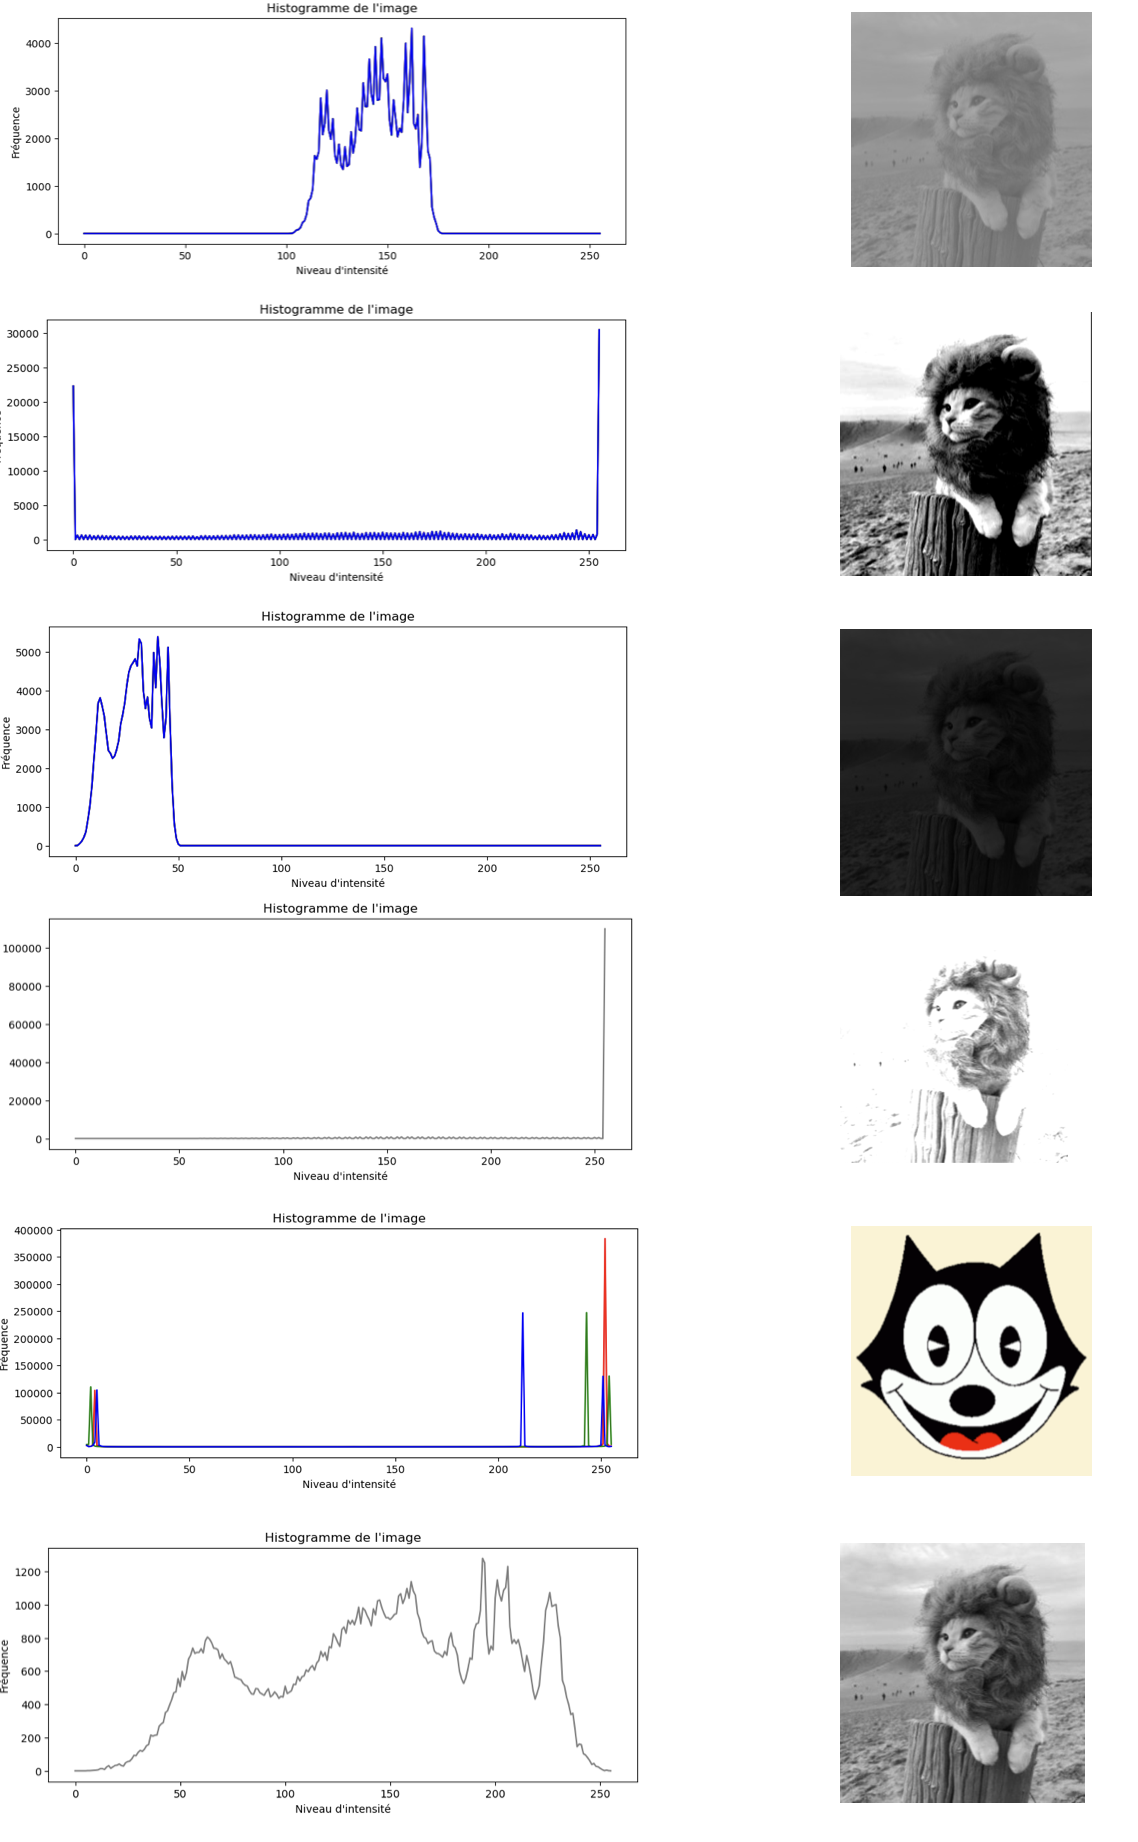

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
2. Modifier l'image pour retrouver un histogramme
</div>

Faites les traitements necessaires sur l'image "chat-lion" pour retrouver les histogrammes ci-dessous

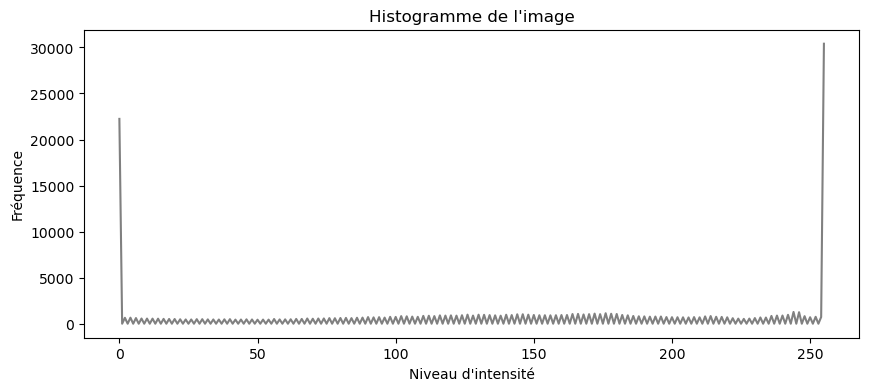

In [4]:
# Charger l'image
image = Image.open("chat-lion.jpg")

# Créer un objet enhanceur de contraste
enhancer = ImageEnhance.Contrast(image)

# Ajuster le contraste
# Le facteur indique de combien augmenter/diminuer le contraste
# > 1 pour augmenter le contraste, < 1 pour le diminuer
facteur_contraste = 2.0
image = enhancer.enhance(facteur_contraste)
# Calculer l'histogramme
histogram = image.histogram()

# Afficher l'histogramme
plt.figure(figsize=(10,4))

# Si l'image est en couleur, diviser l'histogramme en parties pour les canaux Rouge, Vert et Bleu
if image.mode == 'RGB':
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.plot(histogram[256 * i:256 * (i + 1)], color=color)
else:  # Pour une image en niveaux de gris
    plt.plot(histogram, color='gray')

plt.title('Histogramme de l\'image')
plt.xlabel('Niveau d\'intensité')
plt.ylabel('Fréquence')
plt.show()
image.show()


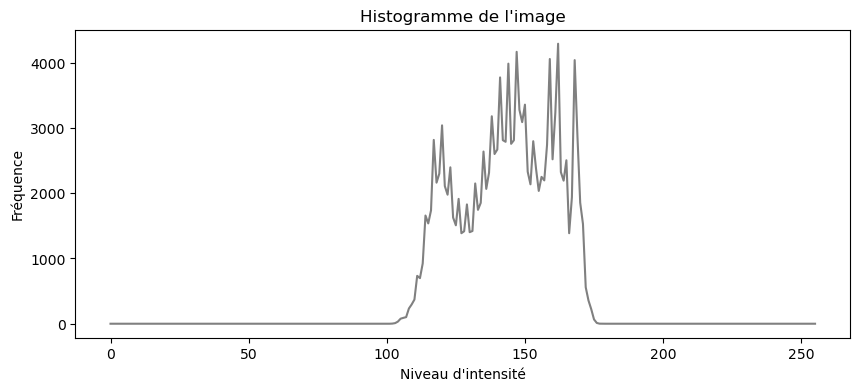

In [3]:
# Charger l'image
image = Image.open("chat-lion.jpg")

# Créer un objet enhanceur de contraste
enhancer = ImageEnhance.Contrast(image)

# Ajuster le contraste
# Le facteur indique de combien augmenter/diminuer le contraste
# > 1 pour augmenter le contraste, < 1 pour le diminuer
facteur_contraste = 0.3
image = enhancer.enhance(facteur_contraste)
# Calculer l'histogramme
histogram = image.histogram()

# Afficher l'histogramme
plt.figure(figsize=(10,4))

# Si l'image est en couleur, diviser l'histogramme en parties pour les canaux Rouge, Vert et Bleu
if image.mode == 'RGB':
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.plot(histogram[256 * i:256 * (i + 1)], color=color)
else:  # Pour une image en niveaux de gris
    plt.plot(histogram, color='gray')

plt.title('Histogramme de l\'image')
plt.xlabel('Niveau d\'intensité')
plt.ylabel('Fréquence')
plt.show()
image.show()

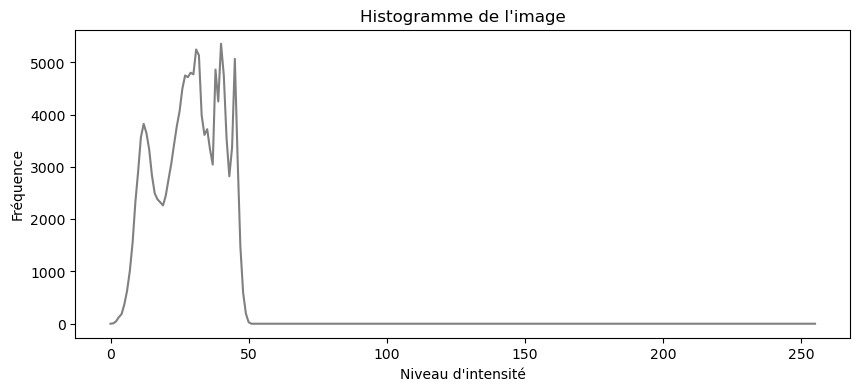

In [5]:
image = Image.open("chat-lion.jpg")
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(0.2)

# Calculer l'histogramme
histogram = image.histogram()

# Afficher l'histogramme
plt.figure(figsize=(10,4))

# Si l'image est en couleur, diviser l'histogramme en parties pour les canaux Rouge, Vert et Bleu
if image.mode == 'RGB':
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.plot(histogram[256 * i:256 * (i + 1)], color=color)
else:  # Pour une image en niveaux de gris
    plt.plot(histogram, color='gray')

plt.title('Histogramme de l\'image')
plt.xlabel('Niveau d\'intensité')
plt.ylabel('Fréquence')
plt.show()
image.show()

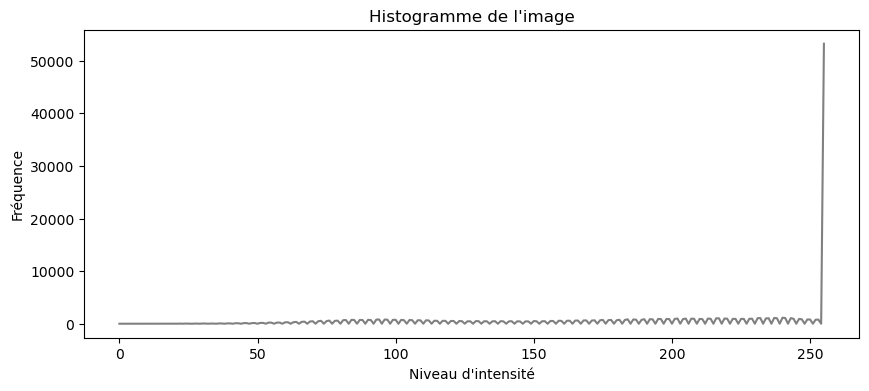

In [7]:
image = Image.open("chat-lion.jpg")
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(1.5)

# Calculer l'histogramme
histogram = image.histogram()

# Afficher l'histogramme
plt.figure(figsize=(10,4))

# Si l'image est en couleur, diviser l'histogramme en parties pour les canaux Rouge, Vert et Bleu
if image.mode == 'RGB':
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.plot(histogram[256 * i:256 * (i + 1)], color=color)
else:  # Pour une image en niveaux de gris
    plt.plot(histogram, color='gray')

plt.title('Histogramme de l\'image')
plt.xlabel('Niveau d\'intensité')
plt.ylabel('Fréquence')
plt.show()
image.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
3. Normalisation
</div>

Codez une fonction qui normalise une image passé en argument

Avec Pillow:

In [11]:
def normalize_image(image_path):
    # Charger l'image
    image = Image.open(image_path)
    # Convertir en niveaux de gris
    grayscale_image = image.convert('L')
    pixels = list(grayscale_image.getdata())
    
    # Calculer f_min et f_max
    f_min = min(pixels)
    f_max = max(pixels)
    
    # Appliquer la formule de normalisation
    def normalize_value(x):
        return 255 * (x - f_min) / (f_max - f_min) if f_max != f_min else 0

    # Créer une nouvelle image avec les valeurs normalisées
    normalized_pixels = [int(normalize_value(x)) for x in pixels]
    # Créer une nouvelle image à partir des pixels normalisés
    normalized_image = Image.new('L', grayscale_image.size)
    normalized_image.putdata(normalized_pixels)
    
    return normalized_image

img = normalize_image("camera.jpg")
img.show()

Avec Numpy:

In [ ]:
def normalize_image(image_path):
    # Charger l'image et la convertir en niveaux de gris
    image = Image.open(image_path).convert('L')
    
    # Convertir l'image en un tableau NumPy
    image_data = np.array(image,dtype=np.float32)
    
    # Calculer f_min et f_max
    f_min = np.min(image_data)
    f_max = np.max(image_data)
    
    # Appliquer la formule de normalisation
    if f_max != f_min:
        # Normaliser les valeurs des pixels
        normalized_image_data = 255 * (image_data - f_min) / (f_max - f_min)
        normalized_image_data = np.round(normalized_image_data)
    else:
        # Si l'image est uniforme (f_max == f_min), créer une image noire
        normalized_image_data = np.zeros_like(image_data)
    
    # Convertir l'image normalisée en une image PIL pour l'affichage et le sauvegarde
    normalized_image = Image.fromarray(normalized_image_data.astype('uint8'), 'L')
    
    return normalized_image

# Utiliser la fonction
img = normalize_image("camera.jpg")
img.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
4. Quantification
</div>

Codez une fonction qui prend comme arguments une image et un nombre d'intervalles k et calcule la quantification de l'image. Vous devez obtenir les résultats ci-dessous avec l'image chat-lion.

In [3]:
def quantize_image(image_path, k):
    # Charger l'image
    image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
    Vmin, Vmax = 0, 255  # Valeurs min et max pour une image 8 bits
    
    # Calculer la taille des intervalles
    interval_size = (Vmax - Vmin) / k
    
    # Fonction pour calculer la valeur quantifiée
    def quantize_value(x):
        # Trouver le numéro de l'intervalle qui contient x
        interval_number = int((x - Vmin) / interval_size)
        # Assurer que le numéro de l'intervalle n'excède pas k-1
        interval_number = min(interval_number, k - 1)
        # Calculer la valeur représentative pour cet intervalle:
        #   - s'il s'agit du premier intervalle, on veut que le pixel soit noir
        #   - s'il s'agit du dernier intervalle, on veut que le pixel soit blanc
        #   - sinon, on prent la valeur correspondante au milieu de l'intervalle
        if interval_number == 0:
            quantized_value = 0
        elif interval_number == k-1:
            quantized_value = 255
        else:
            quantized_value = interval_number * interval_size + interval_size / 2
        # Retourner la valeur quantifiée
        return int(quantized_value)

    # Créer une nouvelle image avec les valeurs quantifiées
    quantized_pixels = [quantize_value(p) for p in image.getdata()]
    quantized_image = Image.new('L', image.size)
    quantized_image.putdata(quantized_pixels)
    
    return quantized_image

# Utiliser la fonction pour quantifier une image en 4 niveaux de gris
quantized_image = quantize_image('chat-lion.jpg', 2)
quantized_image.show()
